In [1]:
import pandas as pd


In [2]:
url = r"D:\NED\final paper of ds\Hybrid Exam Paper\sales_data.csv"

In [5]:
sales_data = pd.read_csv(url, encoding = 'Latin-1')

In [9]:
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'])

In [18]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

A dataset containing information about the sales of different products in a retail store is available at sales_data.csv. Analyze the dataset and identify the top-selling products, the most profitable products, and the products with the highest customer satisfaction. Visualize your findings using appropriate charts and graphs.

In [17]:
sales_data.groupby('PRODUCTCODE')['QUANTITYORDERED'].sum()

PRODUCTCODE
S10_1678      944
S10_1949      961
S10_2016      928
S10_4698      921
S10_4757      952
             ... 
S700_3505     917
S700_3962     852
S700_4002    1029
S72_1253      920
S72_3212      927
Name: QUANTITYORDERED, Length: 109, dtype: int64

<AxesSubplot:xlabel='PRODUCTLINE'>

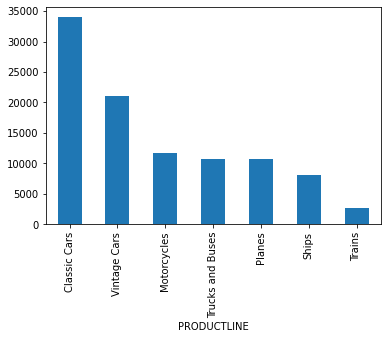

In [28]:
# top selling product

sales_data.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().nlargest(10).plot.bar()

In [25]:
#most profitable product
#sales_data['PROFITMARGIN'] = sales_data['MSRP'] - sales_data['PRICEEACH']
#sales_data[['MSRP','PRICEEACH']]
sales_data['PROFITABLE'] = sales_data['PROFITMARGIN'] * sales_data['QUANTITYORDERED']

In [26]:
sales_data.groupby('PRODUCTLINE')['PROFITABLE'].sum()

PRODUCTLINE
Classic Cars        1115670.60
Motorcycles          168081.71
Planes                74132.79
Ships                 21363.60
Trains                -6760.26
Trucks and Buses     163032.82
Vintage Cars         170933.95
Name: PROFITABLE, dtype: float64

<AxesSubplot:ylabel='PRODUCTLINE'>

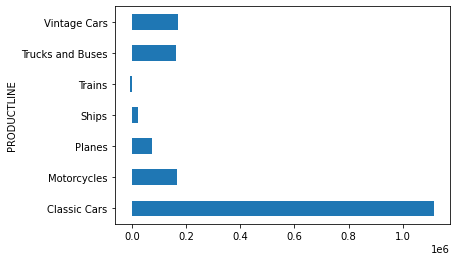

In [27]:
sales_data.groupby('PRODUCTLINE')['PROFITABLE'].sum().plot.barh()

In [31]:
#most highest customer satisfaction
sales_data.groupby('PRODUCTLINE')['PROFITABLE'].mean()

PRODUCTLINE
Classic Cars        1153.744157
Motorcycles          507.799728
Planes               242.264020
Ships                 91.297436
Trains               -87.795584
Trucks and Buses     541.637276
Vintage Cars         281.604530
Name: PROFITABLE, dtype: float64

<AxesSubplot:xlabel='PRODUCTLINE'>

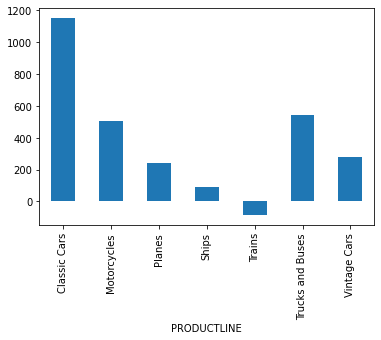

In [33]:
sales_data.groupby('PRODUCTLINE')['PROFITABLE'].mean().plot.bar()

In [42]:
filepath = pd.read_csv(r"D:\NED\final paper of ds\Hybrid Exam Paper\Performance.csv", encoding='Latin-1')

In [43]:
performance

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


A dataset containing information about the performance of students in a school is available at Performance.csv. Analyze the dataset and identify the factors that contribute to student success. Visualize your findings using appropriate charts and graphs.

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


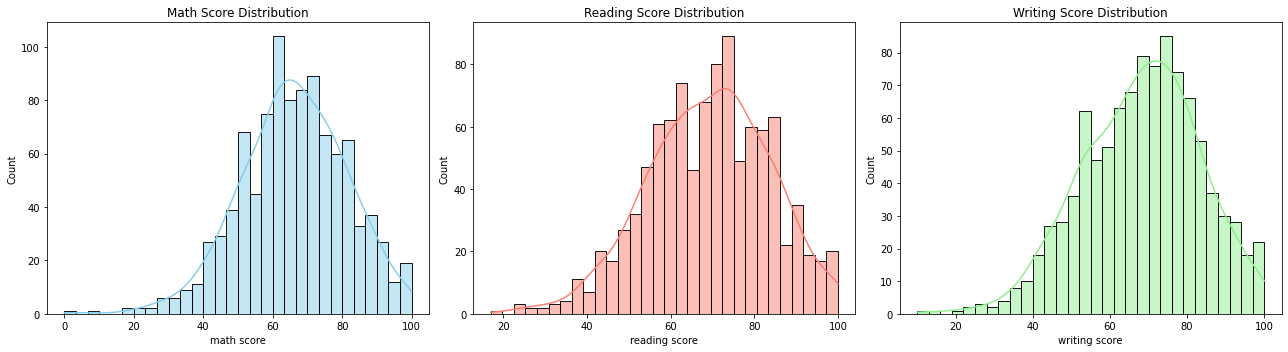

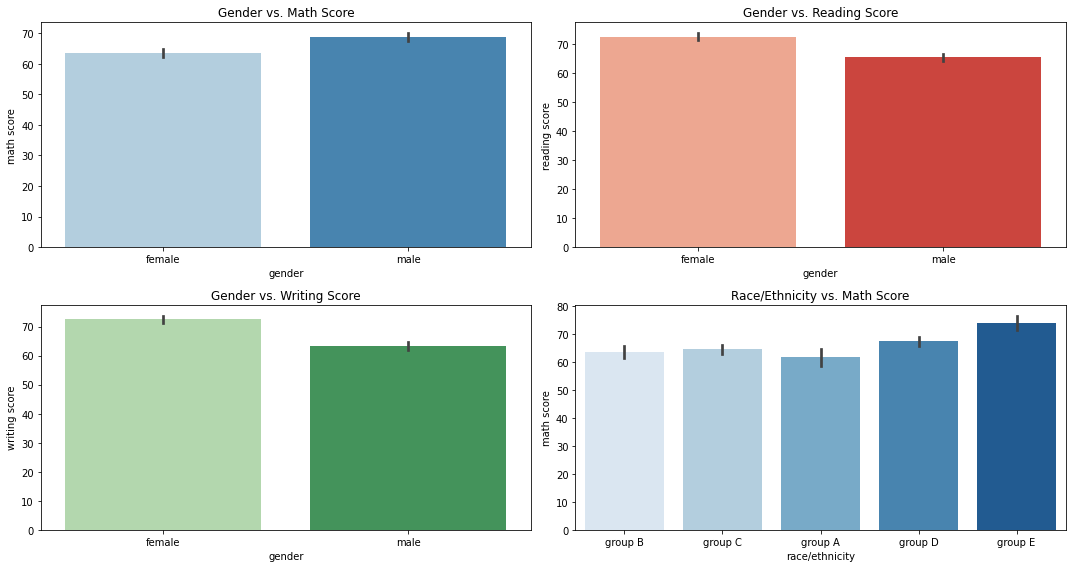

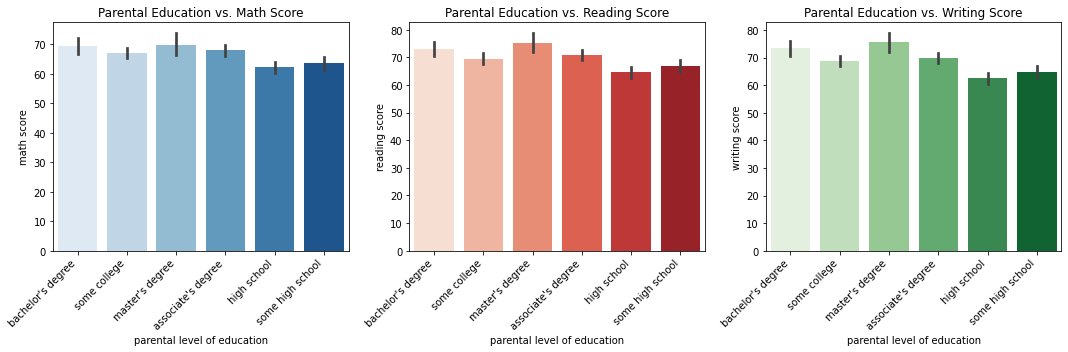

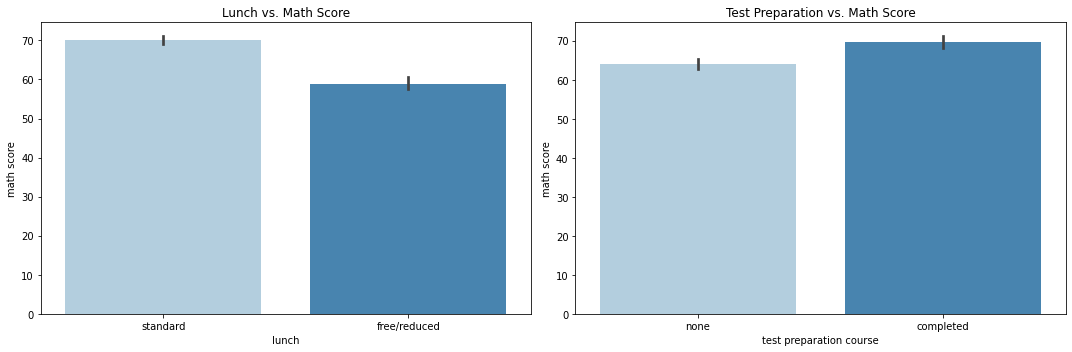

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_csv(r"D:\NED\final paper of ds\Hybrid Exam Paper\Performance.csv", encoding='Latin-1')

# Explore the dataset
print(df.head())

# Visualize the distribution of scores
plt.figure(figsize=(18, 5))

# Math Score Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['math score'], bins=30, kde=True, color='skyblue')
plt.title('Math Score Distribution')

# Reading Score Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], bins=30, kde=True, color='salmon')
plt.title('Reading Score Distribution')

# Writing Score Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], bins=30, kde=True, color='lightgreen')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

# Visualize factors influencing student success
plt.figure(figsize=(15, 8))

# Gender vs. Average Scores
plt.subplot(2, 2, 1)
sns.barplot(x='gender', y='math score', data=df, palette='Blues')
plt.title('Gender vs. Math Score')

plt.subplot(2, 2, 2)
sns.barplot(x='gender', y='reading score', data=df, palette='Reds')
plt.title('Gender vs. Reading Score')

plt.subplot(2, 2, 3)
sns.barplot(x='gender', y='writing score', data=df, palette='Greens')
plt.title('Gender vs. Writing Score')

# Race/Ethnicity vs. Average Scores
plt.subplot(2, 2, 4)
sns.barplot(x='race/ethnicity', y='math score', data=df, palette='Blues')
plt.title('Race/Ethnicity vs. Math Score')

plt.tight_layout()
plt.show()

# Parental Level of Education vs. Average Scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='parental level of education', y='math score', data=df, palette='Blues')
plt.title('Parental Education vs. Math Score')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.barplot(x='parental level of education', y='reading score', data=df, palette='Reds')
plt.title('Parental Education vs. Reading Score')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.barplot(x='parental level of education', y='writing score', data=df, palette='Greens')
plt.title('Parental Education vs. Writing Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Lunch and Test Preparation vs. Average Scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='lunch', y='math score', data=df, palette='Blues')
plt.title('Lunch vs. Math Score')

plt.subplot(1, 2, 2)
sns.barplot(x='test preparation course', y='math score', data=df, palette='Blues')
plt.title('Test Preparation vs. Math Score')

plt.tight_layout()
plt.show()
